In [1]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import os

### Number of sample in each label

In [2]:
file_target = '../assets/data/'
for i,path in enumerate(os.listdir(file_target)):
    tmp = pd.read_csv(f'{file_target}{path}')
    if i == 0 :
        data = tmp
    else:
        data = pd.concat([data,tmp],axis=0)

In [3]:
data.reset_index(inplace=True,drop=True)

In [4]:
data.head()

,comment,rating_star,by,pred_label
0,xem video thấy đính đá toàn bộ tranh nhưng mìn...,3,khanh,negative
1,sịn sò đẹp ok tinh dầu thơm quá mà màu đẹp rẻ ...,5,ori,positive
2,sạc dk tuần ko vo pin luôn hazzz lúc mới nhận ...,2,thang,negative
3,nhỏ hơn trong ảnh rất nhiều cảm thấy hơi phí t...,3,giang,neural
4,quần thun lạnh co dãn tốt nhưng mình cảm giác ...,3,thang,neural


In [5]:
data.dropna(inplace=True)

In [6]:
data.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='pred_label', ylabel='count'>

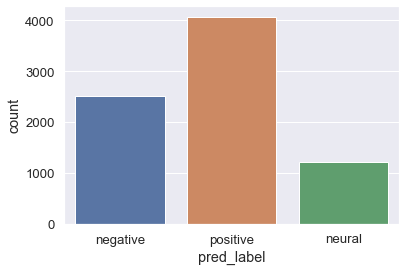

In [7]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(data.pred_label)

#### load stopwords

In [8]:
stopwords = []
with open('../assets/stopword/stopword.txt','r',encoding="utf8") as f:
    for word in f:
        stopwords.append(word.replace('\n',''))

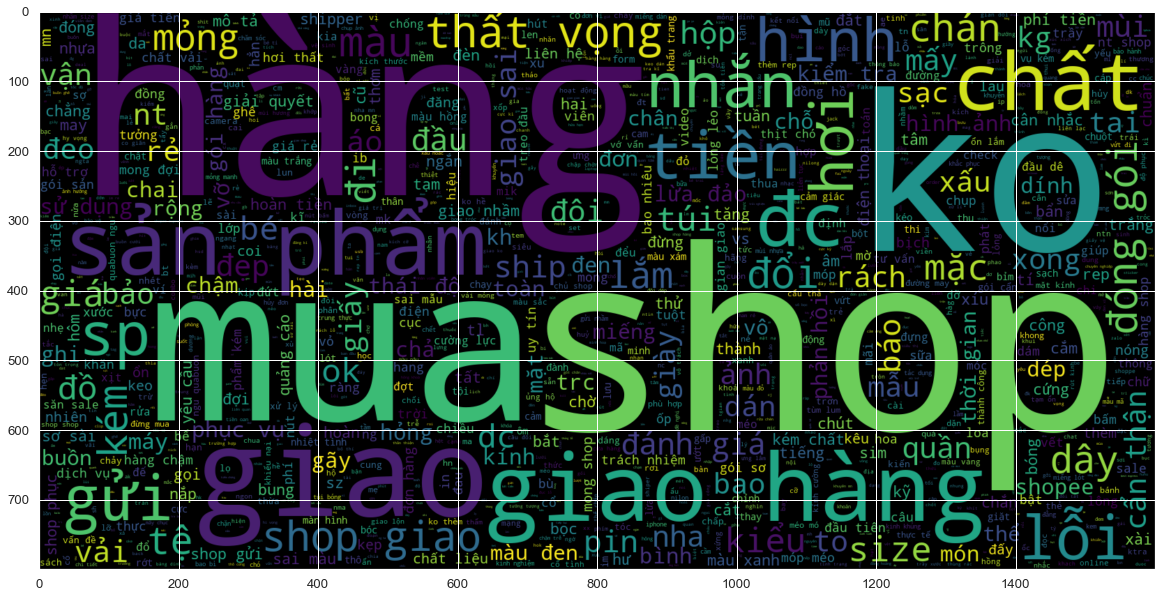

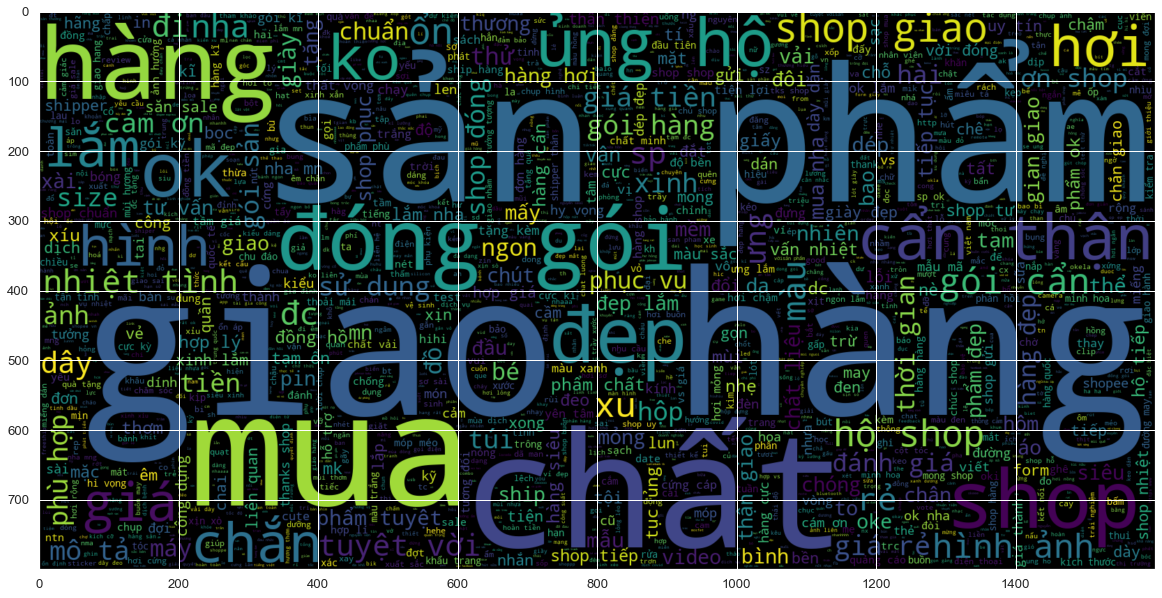

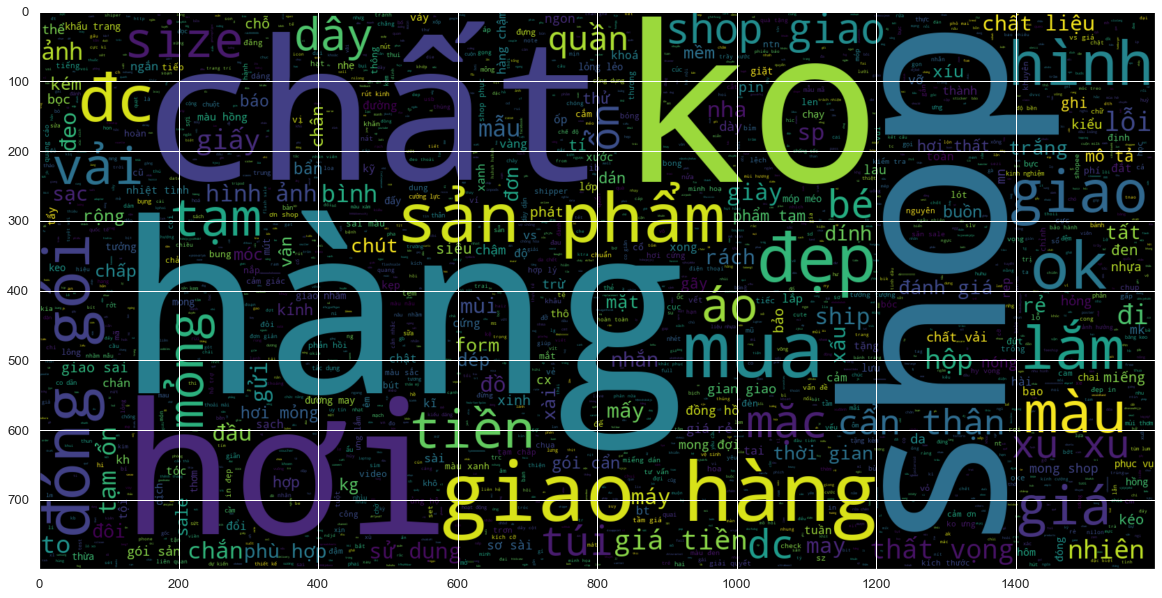

In [9]:
for label in data.pred_label.unique():
    plt.figure(figsize = (20,20)) # Positive Review Text
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,stopwords=stopwords).generate(" ".join(data[data.pred_label == label].comment))
    plt.imshow(wc , interpolation = 'bilinear')
    plt.savefig(f'img/{label}.png')

In [10]:
data

,comment,rating_star,by,pred_label
0,xem video thấy đính đá toàn bộ tranh nhưng mìn...,3,khanh,negative
1,sịn sò đẹp ok tinh dầu thơm quá mà màu đẹp rẻ ...,5,ori,positive
2,sạc dk tuần ko vo pin luôn hazzz lúc mới nhận ...,2,thang,negative
3,nhỏ hơn trong ảnh rất nhiều cảm thấy hơi phí t...,3,giang,neural
4,quần thun lạnh co dãn tốt nhưng mình cảm giác ...,3,thang,neural
...,...,...,...,...
7803,áo chán lắm nhé chất vừa mỏng form áo bé lắm,2,thang,negative
7804,màu trắng thì tạm ổn còn màu vàng thì là vàng ...,4,khanh,positive
7805,cho bên giao hàng best express giao quá chậm t...,1,ori,negative
7806,lần nào shopee express giao là rằng bị bóc hàn...,1,ori,negative


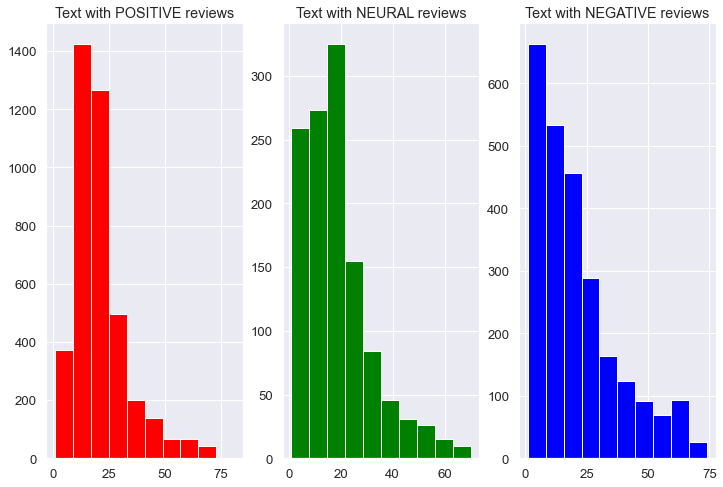

In [11]:
nb_class = len(data.pred_label.unique())
list_color = ['red','green','blue']
fig,ax=plt.subplots(1,nb_class,figsize=(12,8))
for i,label in enumerate(data.pred_label.unique()):
    text_len=data[data['pred_label']==label]['comment'].str.split().map(lambda x: len(x))
    ax[i-1].hist(text_len,color=list_color[i-1])
    ax[i-1].set_title(f'Text with {label.upper()} reviews')
plt.show()

In [12]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.comment)
corpus[:5]

['xem', 'video', 'thấy', 'đính', 'đá']

In [13]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'hàng': 4553,
 'shop': 3469,
 'giao': 3239,
 'mua': 2018,
 'chất': 1721,
 'không': 1690,
 'có': 1677,
 'nhưng': 1594,
 'mình': 1572,
 'sản': 1531}

In [14]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
def plotCommonWord(label,topn,ngram):
    dataset = data[data['pred_label'] == label]
    most_common_uni = get_top_text_ngrams(dataset.comment,topn,ngram)
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
                width=700, height=700,color='Common_words')
    fig.show()

In [16]:
plotCommonWord('positive',10,2)

In [17]:
plotCommonWord('negative',10,2)

In [18]:
plotCommonWord('neural',10,2)